## Skin Cancer Classification 

{'name': 'Benign', 'class': 0, 'confidence': 0.982}


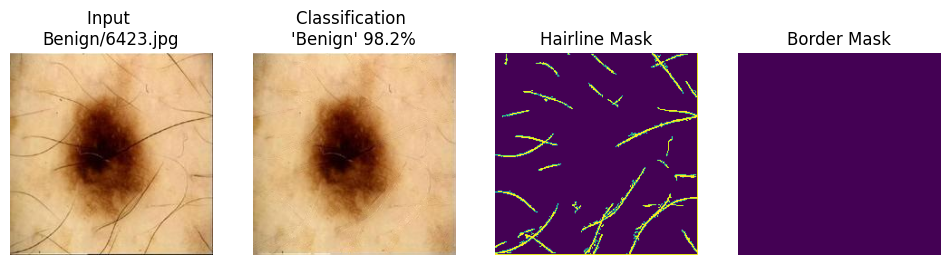

{'name': 'Benign', 'class': 0, 'confidence': 1.0}


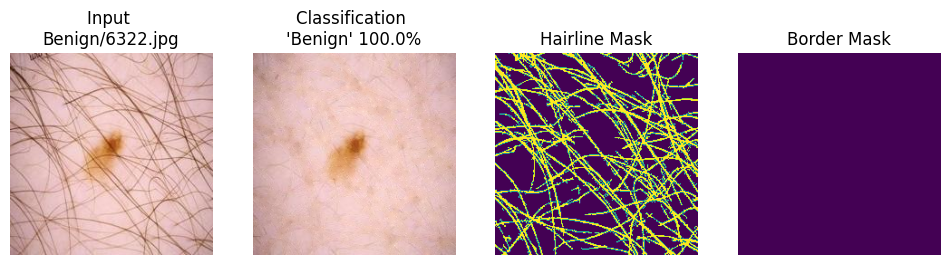

{'name': 'Benign', 'class': 0, 'confidence': 1.0}


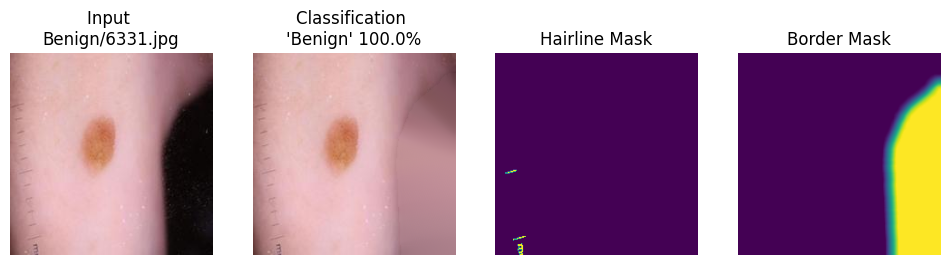

{'name': 'Benign', 'class': 0, 'confidence': 0.937}


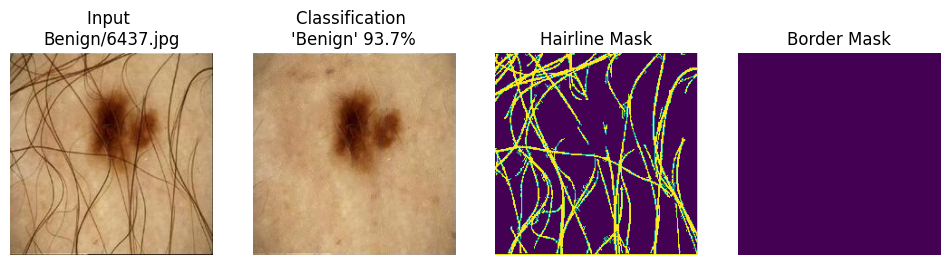

{'name': 'Benign', 'class': 0, 'confidence': 1.0}


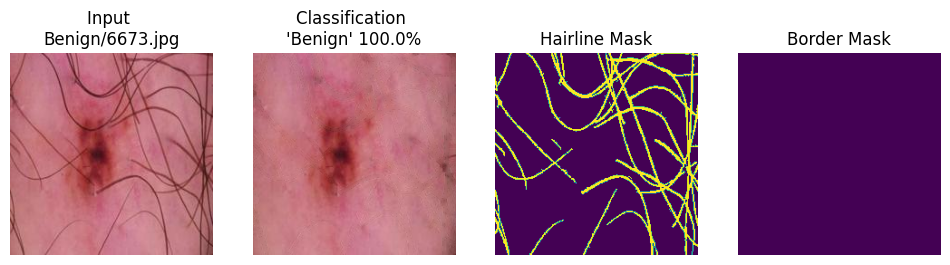

{'class': 0, 'name': 'Benign', 'confidence': 0.851}


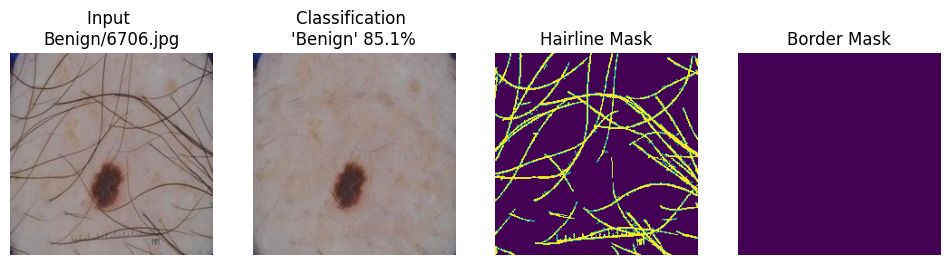

{'class': 0, 'name': 'Benign', 'confidence': 0.813}


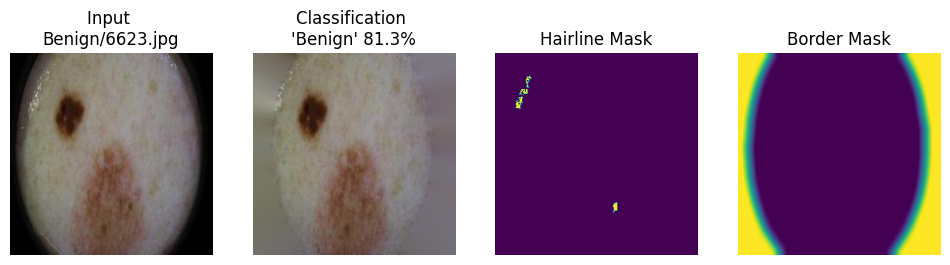

{'name': 'Benign', 'class': 0, 'confidence': 1.0}


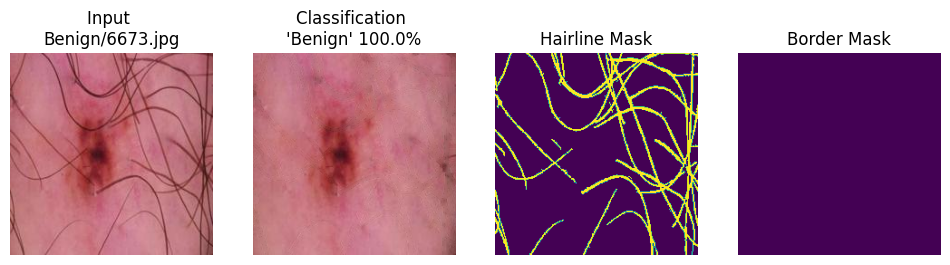

{'name': 'Benign', 'class': 0, 'confidence': 0.979}


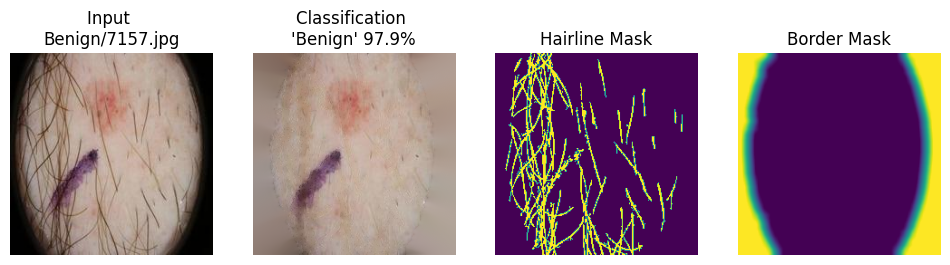

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


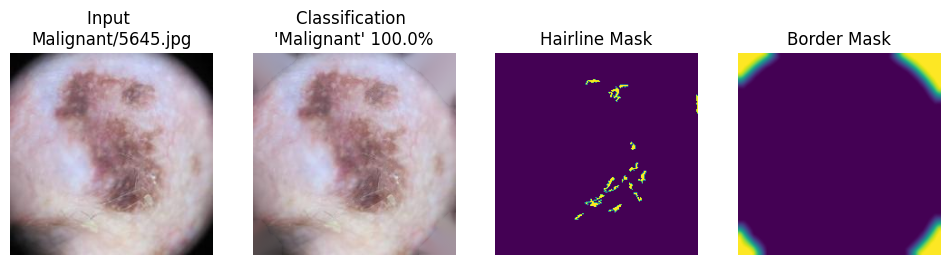

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


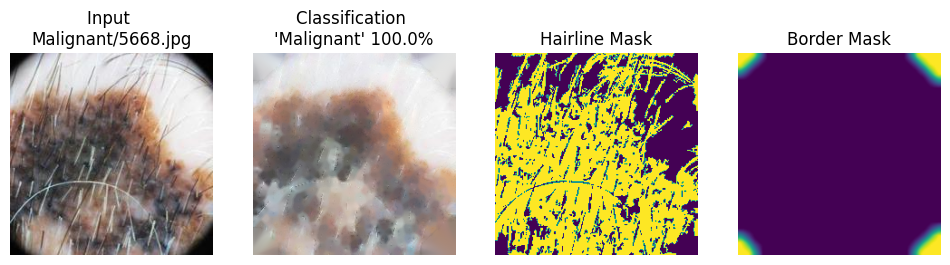

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


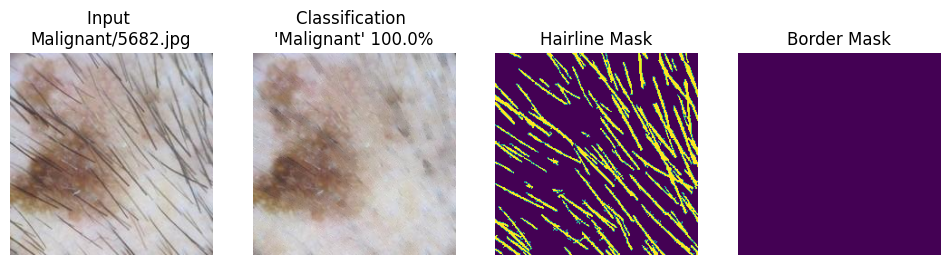

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


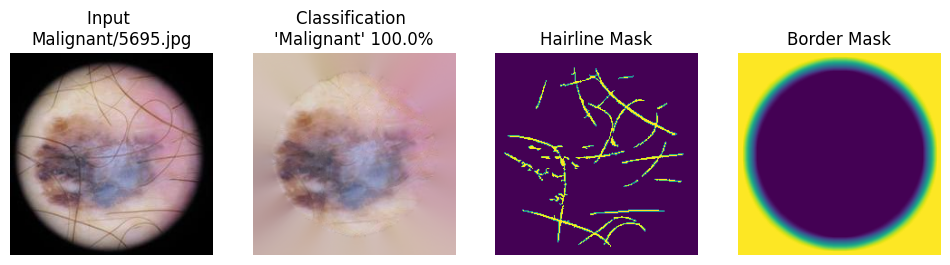

{'name': 'Malignant', 'class': 1, 'confidence': 0.929}


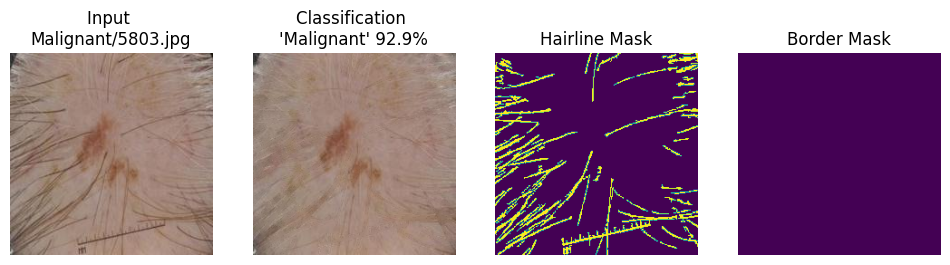

{'name': 'Malignant', 'class': 1, 'confidence': 0.946}


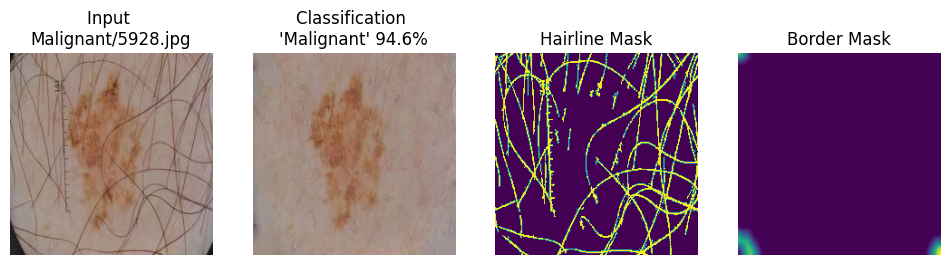

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


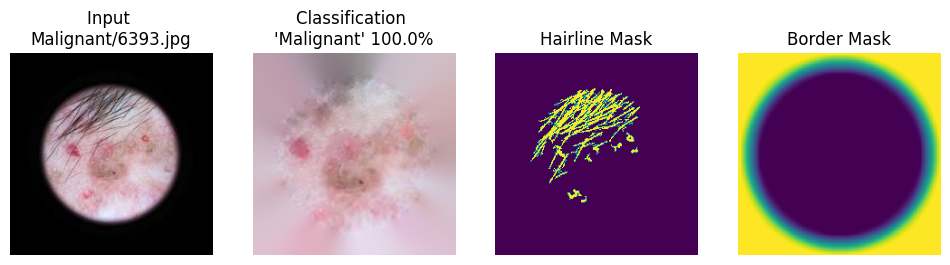

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


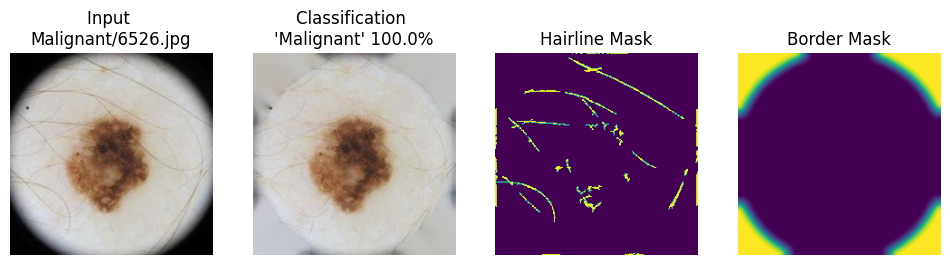

{'name': 'Malignant', 'class': 1, 'confidence': 1.0}


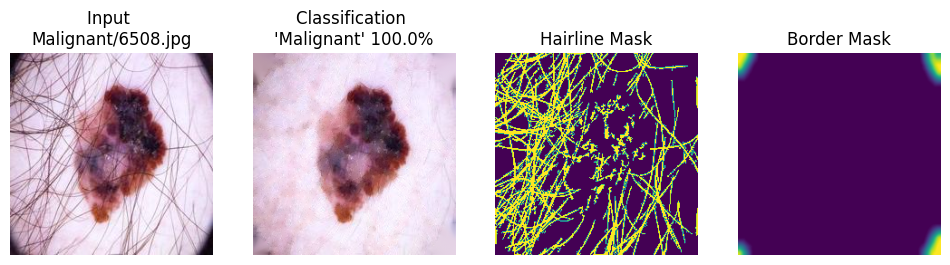

In [1]:
import os
import cv2 
from classifier import SkinCancerClassifier
from utils.plotting import plot_images

# Initialize the classifier with the model path
classifier = SkinCancerClassifier("models/yolov8s-cls/skin-cancer.pt")

# List of full image paths to test
image_directory_root = "raw_dataset/test/"
image_paths = [
    "Benign/6423.jpg",
    "Benign/6322.jpg",
    "Benign/6331.jpg",
    "Benign/6437.jpg",
    "Benign/6673.jpg",
    "Benign/6706.jpg",
    "Benign/6623.jpg",
    "Benign/6673.jpg",
    "Benign/7157.jpg",
    "Malignant/5645.jpg",
    "Malignant/5668.jpg",
    "Malignant/5682.jpg",
    "Malignant/5695.jpg",
    "Malignant/5803.jpg",
    "Malignant/5928.jpg",
    "Malignant/6393.jpg",
    "Malignant/6526.jpg",
    "Malignant/6508.jpg"
]


# Loop through each image path
for image_path in image_paths:

    # Load image
    image = cv2.imread(os.path.join(image_directory_root, image_path))

    # Predict class
    class_summary, image_cleaned, hairline_mask, border_mask = classifier.predict(image)
    print(class_summary)
    class_name = class_summary['name']
    class_conf = class_summary['confidence']
    
    # Plot results
    plot_images([image, image_cleaned, hairline_mask, border_mask], 
                [f"Input \n{image_path}", f"Classification \n'{class_name}' {class_conf:.1%}", "Hairline Mask", "Border Mask"])

## Evaluate Model Accuracy 

In [2]:
from classifier import SkinCancerClassifier
from utils.plotting import plot_confusion_matrix

# Initialize the classifier with the model path
classifier = SkinCancerClassifier("models/yolov8s-cls/skin-cancer.pt")

accuracy, precision = classifier.evaluate("raw_dataset/test", enable_postprocess=False)
print("accuracy: ", accuracy)
print("precision: ", precision)

accuracy, precision = classifier.evaluate("raw_dataset/test", enable_postprocess=True)
print("accuracy: ", accuracy)
print("precision: ", precision)

Evaluate Without Postprocessing: 100%|██████████| 1998/1998 [01:11<00:00, 28.13it/s]


accuracy:  0.951
precision:  0.947


Evaluate With Postprocessing: 100%|██████████| 1998/1998 [01:10<00:00, 28.49it/s]

accuracy:  0.949
precision:  0.951
